# Index
* [The Basics](#thebasics)
* [Shape Manipulation](#shapemanipulation)
* [Copies and Views](#copiesnviews)
* [Broadcasting Rules](#broadcastingrules)
* [Advanced Indexing and Tricks](#advancedindexing)
* [Linear Algebra](#linearalgebra)
* [Tricks and Tips](#tricksntips)

In [1]:
import numpy as np

np.__version__

'1.18.4'

<a id="thebasics"></a>
## The Basics

Numpy's array class is called ```ndarray```, also known by the alias ```array```. Note that ```np.array``` is not the same as Standard Python Library class ```array.array```.

### Important Attributes
- ```ndarray.ndim```
- ```ndarray.shape```
- ```ndarray.size```
- ```ndarray.dtype```
- ```ndarray.data```

In [66]:
# ARRAY CREATION
a = np.arange(10,30,2).reshape(2,5,1)

print(f"a:\n{a}\n")
print(f"type of a:\n{type(a)}\n")
print(f"ndim of a:\n{a.ndim}\n")
print(f"shape of a:\n{a.shape}\n")
print(f"size of a:\n{a.size}\n")
print(f"dtype of a:\n{a.dtype}\n")

b = np.array([1.3, 2.6, 3.7])
print(f"b:\n{b}\n")
print(f"dtype of b:\n{b.dtype}\n")

c = np.random.rand(3,2)
print(f"c:\n{c}\n")

a:
[[[10]
  [12]
  [14]
  [16]
  [18]]

 [[20]
  [22]
  [24]
  [26]
  [28]]]

type of a:
<class 'numpy.ndarray'>

ndim of a:
3

shape of a:
(2, 5, 1)

size of a:
10

dtype of a:
int64

b:
[1.3 2.6 3.7]

dtype of b:
float64

c:
[[0.76495447 0.70306371]
 [0.62643073 0.94684424]
 [0.84711915 0.67685197]]



In [24]:
# array transforms sequences of sequences into 2D arrays
# sequences of sequences of sequences into 3D arrays
b = np.array([(1, 2), (3, 4)]) 
print(f"b:\n{b}\n")
print(f"dim of b:\n{b.ndim}\n")
print(f"shape of b:\n{b.shape}\n")

c = np.array([([7], [8]), ([9], [10]), ([11], [12])], dtype=float) 
print(f"c:\n{c}\n")
print(f"dim of c:\n{c.ndim}\n")
print(f"shape of c:\n{c.shape}\n")

b:
[[1 2]
 [3 4]]

dim of b:
2

shape of b:
(2, 2)

c:
[[[ 7.]
  [ 8.]]

 [[ 9.]
  [10.]]

 [[11.]
  [12.]]]

dim of c:
3

shape of c:
(3, 2, 1)



In [34]:
print(np.zeros((3,4), dtype=complex))
print(np.ones((5,2,3), dtype=int))
print(np.empty((2,3,1))) # default is float64

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[[[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]]
[[[ 7.]
  [ 8.]
  [ 9.]]

 [[10.]
  [11.]
  [12.]]]


In [46]:
from numpy import pi

# Linspace takes the min value, max value and no. of elements we want
# divide the space equally for us
np.linspace(0, 2*pi, 15).reshape(3, 5)

array([[0.        , 0.44879895, 0.8975979 , 1.34639685, 1.7951958 ],
       [2.24399475, 2.6927937 , 3.14159265, 3.5903916 , 4.03919055],
       [4.48798951, 4.93678846, 5.38558741, 5.83438636, 6.28318531]])

### Basic Operations

Arithmetic operators on arrays apply **elementwise**. A new array is created and filled with the result. 

For example: product operator ```*``` operates elementwise in NumPy arrays. Matrix product can be performed using ```@``` operator or the ```dot``` function.

In [65]:
a = np.arange(4).reshape(2,2)
b = np.ones((2,2))

print(f"a:\n{a}\nb:\n{b}\na - b:\n{a-b}\n")
print(f"a * b:\n{a*b}\n")
print(f"a <= 5:\n{a<=5}\n")

print(f"Matrix product using @:\n{a@b}\n")
print(f"using dot:\n{a.dot(b)}\n")

b += a
b

a:
[[0 1]
 [2 3]]
b:
[[1. 1.]
 [1. 1.]]
a - b:
[[-1.  0.]
 [ 1.  2.]]

a * b:
[[0. 1.]
 [2. 3.]]

a <= 5:
[[ True  True]
 [ True  True]]

Matrix product using @:
[[1. 1.]
 [5. 5.]]

using dot:
[[1. 1.]
 [5. 5.]]



array([[1., 2.],
       [3., 4.]])

In [219]:
# Sum
a = np.arange(6).reshape(2,3)
print(a)

col_sum = a.sum(axis=0) # sum of each column
row_sum = a.sum(axis=1) # sum of each row
print(f"\ncolumn sum: axis=0\n{col_sum}\n")
print(f"row sum: axis=1\n{row_sum}\n")

min_of_row = a.min(axis=1) # min of each row
print(f"min of each row:\n{min_of_row}\n")

cum_sum = a.cumsum(axis=1) # cumulative sum along each row
print(f"cumulative sum along each row:\n{cum_sum}\n")

avg_col = a.mean(axis=0) # mean of each col
print(f"mean of each col:\n{avg_col}\n")

[[0 1 2]
 [3 4 5]]

column sum: axis=0
[3 5 7]

row sum: axis=1
[ 3 12]

min of each row:
[0 3]

cumulative sum along each row:
[[ 0  1  3]
 [ 3  7 12]]

mean of each col:
[1.5 2.5 3.5]



### Indexing, slicing and iterating

In [129]:
a = np.random.randint(9, size=(6,4))

print(f"a:\n{a}\n")
print(f"first row: a[0]\n{a[0]}\n")
print(f"second till third row: a[1:3]\n{a[1:3]}\n")
print(f"third col: a[:,2]\n{a[:,2]}\n")
print(f"first col till third col: a[:,:3]\n{a[:,:3]}\n")
print(f"even num row: a[1:6:2]\n{a[1:6:2]}\n")

print(f"a:\n{a}\n")
print(f"odd num col: a[:,0:4:2]\n{a[:,0:4:2]}\n")
print(f"even num idx elements: a[1:6:2,1:4:2]\n{a[1:6:2,1:4:2]}\n")
print(f"reverse a: a[::-1]\n{a[::-1]}\n")
print(f"last third to fifth row: a[-5:-2]\n{a[-5:-2]}\n")

a:
[[7 4 1 4]
 [4 5 5 1]
 [2 0 0 5]
 [2 4 3 6]
 [2 2 3 3]
 [8 2 5 5]]

first row: a[0]
[7 4 1 4]

second till third row: a[1:3]
[[4 5 5 1]
 [2 0 0 5]]

third col: a[:,2]
[1 5 0 3 3 5]

first col till third col: a[:,:3]
[[7 4 1]
 [4 5 5]
 [2 0 0]
 [2 4 3]
 [2 2 3]
 [8 2 5]]

even num row: a[1:6:2]
[[4 5 5 1]
 [2 4 3 6]
 [8 2 5 5]]

a:
[[7 4 1 4]
 [4 5 5 1]
 [2 0 0 5]
 [2 4 3 6]
 [2 2 3 3]
 [8 2 5 5]]

odd num col: a[:,0:4:2]
[[7 1]
 [4 5]
 [2 0]
 [2 3]
 [2 3]
 [8 5]]

even num idx elements: a[1:6:2,1:4:2]
[[5 1]
 [4 6]
 [2 5]]

reverse a: a[::-1]
[[8 2 5 5]
 [2 2 3 3]
 [2 4 3 6]
 [2 0 0 5]
 [4 5 5 1]
 [7 4 1 4]]

last third to fifth row: a[-5:-2]
[[4 5 5 1]
 [2 0 0 5]
 [2 4 3 6]]



<a id="shapemanipulation"></a>
## Shape Manipulation

### Changing the shape of array
* ```reshape```
* ```ravel```
* ```transpose```
* ```resize```
* ```vstack```
* ```hstack```
* ```concatenate```
* ```hsplit```
* ```vsplit```

The ```reshape``` function returns its argument with a modified shape, whereas the ```resize``` method modified the array itself.

In [201]:
b = np.ones((3,4))
b.resize(6,3)
print(b)

a = np.random.rand(2,2)
print(a)
extra_dim = a[None,:]
print(f"\nadd extra dimension:\n{extra_dim}{extra_dim.shape}")

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0.3062563  0.59499114]
 [0.01513637 0.11232361]]

add extra dimension:
[[[0.3062563  0.59499114]
  [0.01513637 0.11232361]]](1, 2, 2)


In [186]:
a = np.random.rand(3,4)
a_resize = np.resize(a, (2,2))

print(f"a:\n{a}\n")
print(f"reshape to (6,2):\n{a.reshape(6,2)}\n")
print(f"using (4,-1):\n{a.reshape(4,-1)}\n")
print(f"flatten:\n{a.ravel()}\n")
print(f"transpose:\n{a.T}\n")
print(f"resize a to (2,2):\n{a_resize}\n")

a:
[[4.64410575e-01 3.07544601e-01 5.18033352e-01 5.98523524e-01]
 [7.65630672e-01 7.95722557e-01 8.18135722e-01 2.60016175e-01]
 [5.11082587e-01 1.72819773e-01 1.47962561e-01 2.58445712e-04]]

reshape to (6,2):
[[4.64410575e-01 3.07544601e-01]
 [5.18033352e-01 5.98523524e-01]
 [7.65630672e-01 7.95722557e-01]
 [8.18135722e-01 2.60016175e-01]
 [5.11082587e-01 1.72819773e-01]
 [1.47962561e-01 2.58445712e-04]]

using (4,-1):
[[4.64410575e-01 3.07544601e-01 5.18033352e-01]
 [5.98523524e-01 7.65630672e-01 7.95722557e-01]
 [8.18135722e-01 2.60016175e-01 5.11082587e-01]
 [1.72819773e-01 1.47962561e-01 2.58445712e-04]]

flatten:
[4.64410575e-01 3.07544601e-01 5.18033352e-01 5.98523524e-01
 7.65630672e-01 7.95722557e-01 8.18135722e-01 2.60016175e-01
 5.11082587e-01 1.72819773e-01 1.47962561e-01 2.58445712e-04]

transpose:
[[4.64410575e-01 7.65630672e-01 5.11082587e-01]
 [3.07544601e-01 7.95722557e-01 1.72819773e-01]
 [5.18033352e-01 8.18135722e-01 1.47962561e-01]
 [5.98523524e-01 2.60016175e-01

In [220]:
# Stacking together different arrays
a = np.ones((2,2))
b = np.zeros((2,2))

print(f"a:\n{a}\n")
print(f"b:\n{b}\n")
print(f"vstack a,b:\n{np.vstack((a,b))}\n")
print(f"hstack b,a:\n{np.hstack((b,a))}\n")

c = np.array([[-10, -11]])
d = np.random.rand(2,2)
print(f"c:\n{c}\n")
print(f"d:\n{d}\n")
print(f"concatenate c,d axis=0:\n{np.concatenate((c,d), axis=0)}\n")
print(f"concatenate d,c axis=0:\n{np.concatenate((d,c), axis=0)}\n")
print(f"concatenate d,cT axis=1:\n{np.concatenate((d,c.T), axis=1)}\n")
print(f"concatenate axis=None:\n{np.concatenate((c,d), axis=None)}\n")

a:
[[1. 1.]
 [1. 1.]]

b:
[[0. 0.]
 [0. 0.]]

vstack a,b:
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]]

hstack b,a:
[[0. 0. 1. 1.]
 [0. 0. 1. 1.]]

c:
[[-10 -11]]

d:
[[0.97427294 0.83711985]
 [0.84042664 0.04809956]]

concatenate c,d axis=0:
[[-10.         -11.        ]
 [  0.97427294   0.83711985]
 [  0.84042664   0.04809956]]

concatenate d,c axis=0:
[[  0.97427294   0.83711985]
 [  0.84042664   0.04809956]
 [-10.         -11.        ]]

concatenate d,cT axis=1:
[[  0.97427294   0.83711985 -10.        ]
 [  0.84042664   0.04809956 -11.        ]]

concatenate axis=None:
[-10.         -11.           0.97427294   0.83711985   0.84042664
   0.04809956]



In [227]:
a = np.linspace(0,1,8).reshape(4,2)
hsplit_a = np.hsplit(a,2)
vsplit_a = np.vsplit(a,4)

print(f"a:\n{a}\n")
print(f"hsplit into 2:\n{hsplit_a}\n")
print(f"vsplit into 4:\n{vsplit_a}\n")

a:
[[0.         0.14285714]
 [0.28571429 0.42857143]
 [0.57142857 0.71428571]
 [0.85714286 1.        ]]

hsplit into 2:
[array([[0.        ],
       [0.28571429],
       [0.57142857],
       [0.85714286]]), array([[0.14285714],
       [0.42857143],
       [0.71428571],
       [1.        ]])]

vsplit into 4:
[array([[0.        , 0.14285714]]), array([[0.28571429, 0.42857143]]), array([[0.57142857, 0.71428571]]), array([[0.85714286, 1.        ]])]



<a id="copiesnviews"></a>
## Copies and Views
When operating and manipulating arrays, the data is sometimes copied into a new array and **sometimes not**. There are 3 cases:
* No Copy at All
* View or Shallow Copy
* Deep Copy

In [233]:
# NO COPY AT ALL
a = np.linspace(0, 1, 9).reshape(3,3)
b = a # no new object is created
print(b is a) # a and b are 2 names for the same ndarray object

print(f"a:\n{a}\n")
a[0,0] = -1
print(f"after modified:\n{a}\n")
print(f"b after modified: exact the same as a\n{b}\n")

True
a:
[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]

after modified:
[[-1.     0.125  0.25 ]
 [ 0.375  0.5    0.625]
 [ 0.75   0.875  1.   ]]

b after modified: exact the same as a
[[-1.     0.125  0.25 ]
 [ 0.375  0.5    0.625]
 [ 0.75   0.875  1.   ]]



In [250]:
# VIEW OR SHALLOW COPY
a = np.ones((2,2))
c = a.view()

print(c)
print(c is a) # c is a view of the data owned by a

a[0][0] = 0
print(f"\nafter modified:\n{a}\n")
print(f"c after modified: exact the same as a\n{c}\n")

c = c.reshape((4,1))
print(f"a after c's reshape to 4,1: No change\n{a}\n")

c[0,0] = -1
print(f"a after c's value change:\n{a}\n")

d = a[:, 0]
d[:] = 100 # d[:] is a view of d.
print(f"a after value of d changed:\n{a}\n")

[[1. 1.]
 [1. 1.]]
False

after modified:
[[0. 1.]
 [1. 1.]]

c after modified: exact the same as a
[[0. 1.]
 [1. 1.]]

a after c's reshape to 4,1: No change
[[0. 1.]
 [1. 1.]]

a after c's value change:
[[-1.  1.]
 [ 1.  1.]]

a after value of d changed:
[[100.   1.]
 [100.   1.]]



In [256]:
# DEEP COPY
a = np.zeros((5,5))
k = a.copy()

print(k is a) # a new array object k with new data is created
print(k.base is a) # k doesn't share anything with a

k[3] = 100
print(f"\nk:\n{k}\n")
print(f"a after k[3] = 100:\n{a}\n")

False
False

k:
[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [100. 100. 100. 100. 100.]
 [  0.   0.   0.   0.   0.]]

a after k[3] = 100:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



<a id="broadcastingrules"></a>
## Broadcasting Rules

Broadcasting allows universal functions to deal in a meaningful way with inputs that do not have exactly the same shape.

### First Rule
> If all input arrays do not have the same number of dimensions, a "1" will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions

### Second Rule
> Arrays with size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the "boradcast" array.

After applying these two rules of broadcasting, the sizes of all arrays must match.

In [266]:
a = np.arange(12).reshape((2,3,2))
b = np.arange(6).reshape((3,2))

print(f"a:\n{a}\n")
print(f"b:\n{b}\n")
print(f"a+b:\n{a+b}\n")

a:
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]

b:
[[0 1]
 [2 3]
 [4 5]]

a+b:
[[[ 0  2]
  [ 4  6]
  [ 8 10]]

 [[ 6  8]
  [10 12]
  [14 16]]]



<a id="advancedindexing"></a>
## Advanced Indexing and Tricks
Arrays can be indexed by arrays of integers and arrays of booleans.

In [270]:
a = np.arange(6)**2
i = np.array([1, 3, 5])
j = np.array([[1,2], [3,5]])

print(f"a:\n{a}\n")
print(f"a with i idx: [1,3,5]\n{a[i]}\n")
print(f"a bidimensional:[[1,2], [3,5]]:\n{a[j]}\n")b

a:
[ 0  1  4  9 16 25]

a with i idx: [1,3,5]
[ 1  9 25]

a bidimensional:[[1,2], [3,5]]:
[[ 1  4]
 [ 9 25]]



In [274]:
# Indexing with Boolean Arrays
a = np.linspace(0,1,9).reshape((3,3))
b = a <= 0.5

print(f"a:\n{a}\n")
print(f"b:\n{b}\n")
print(f"a[b]:\n{a[b]}\n")

a:
[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]

b:
[[ True  True  True]
 [ True  True False]
 [False False False]]

a[b]:
[0.    0.125 0.25  0.375 0.5  ]



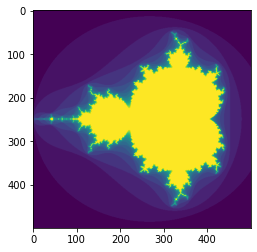

In [283]:
# Using boolean indexing to generate image of Mandelbrot set
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, maxit=20):
    """Display image of mandelbrot"""
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y * 1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2          # who is diverging
        div_now = diverge & (divtime == maxit) # who is diverging now
        divtime[div_now] = i                   # when diverge
        z[diverge] = 3                         # avoid diverging too much
    
    return divtime

plt.imshow(mandelbrot(500,500))

<a id="linearalgebra"></a>
## Linear Algebra

In [293]:
# Simple Array Operations
a = np.arange(4).reshape((2,2))

print(f"a:\n{a}\n")
print(f"a.T:\n{a.T}\n")
print(f"a transpose:\n{a.transpose()}\n")
print(f"inverse of a: inv\n{np.linalg.inv(a)}\n")
print(f"pseudo inverse: pinv\n{np.linalg.pinv(a)}\n")

I = np.eye(3) # identity matrix
print(f"I:\n{I}\n")
print(f"diagonal sum: np.trace\n{np.trace(I)}\n")
I_flip = np.fliplr(I)
print(f"flip I:\n{I_flip}\n")

a:
[[0 1]
 [2 3]]

a.T:
[[0 2]
 [1 3]]

a transpose:
[[0 2]
 [1 3]]

inverse of a: inv
[[-1.5  0.5]
 [ 1.   0. ]]

pseudo inverse: pinv
[[-1.50000000e+00  5.00000000e-01]
 [ 1.00000000e+00  4.21097322e-17]]

I:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

diagonal sum: np.trace
3.0

flip I:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]



<a id="tricksntips"></a>
## Tricks and Tips

In [295]:
# "Automatic" Reshaping
a = np.arange(50)
b = a.reshape((5,2,-1))
print(b.shape)
print(b)

(5, 2, 5)
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]]]


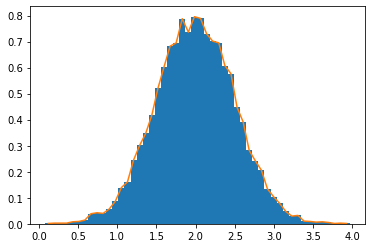

In [299]:
# Histograms
import numpy as np
import matplotlib.pyplot as plt

# Build a vector of 10000 normal deviates with variance 0.5^2 and mu 5
rg = np.random.default_rng(1)
mu, sigma = 2, 0.5
v = rg.normal(mu, sigma, 10000)

plt.hist(v, bins=50, density=1)
(n, bins) = np.histogram(v, bins=50, density=True)
plt.plot(.5*(bins[1:]+bins[:-1]), n)